In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches

In [8]:
class Point:
    x = 0
    y = 0
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        
    def __add__(self, __other: object):
        return Point(self.x + __other.x, self.y + __other.y)
    
    def __eq__(self, __value: object) -> bool:
        if self.x == __value.x and self.y == __value.y:
            return True
        return False
        pass
    
    def onTheSameLine(self, point2, point3):
        m1 = np.abs((self.y - point2.y) / (self.x - point2.x))
        m2 = np.abs((self.y - point3.y) / (self.x - point3.x))
        if m1 != m2:
            return False
        return True
    
    def getAllValidPoints(n, points):
        ValidPoints = list()
        for i in range(n):
            for j in range(n):
                thisPoint = Point(i, j)
                for point1 in points:
                    for point2 in points:
                        if thisPoint != point1 != point2 and not thisPoint.onTheSameLine(point1, point2):
                            ValidPoints.append(thisPoint)
        return ValidPoints
                            
    def evalByDotsInLines(self, n, points):
        validPoints = self.getAllValidPoints(n, points)
        lines = dict()
        for diff in range(n):
            
            dotsCounter = 0
            line = list()
            dist = 1
            # loop for dx
            while ((self.x + (dist * diff) < n and self.y + dist < n) or (self.x - (dist * diff) > n and self.y - dist > n)):
                Pplus = Point(self.x + (dist * diff), self.y + dist)
                Pminus = Point(self.x - (dist * diff), self.y - dist)
                if (Pplus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pplus)
                if (Pminus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pminus)
                dist = dist + 1
            lines['%d'.format(diff)] = (line, dotsCounter)
            
            dotsCounter = 0
            line = list()
            dist = 1
            # loop for dy
            while ((self.x + dist < n and self.y + (dist * diff) < n) or (self.x - dist > n and self.y - (dist * diff) > n)):
                Pplus = Point(self.x + dist, self.y + (dist * diff))
                Pminus = Point(self.x - dist, self.y - (dist * diff))
                if (Pplus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pplus)
                if (Pminus in validPoints):
                    dotsCounter = dotsCounter + 1
                    line.append(Pminus)
                dist  = dist + 1
            lines['%d'.format(diff)] = (line, dotsCounter)

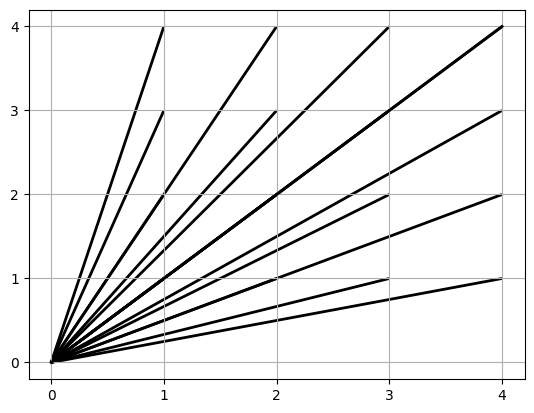

In [4]:
n = 5
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
ticks = np.arange(0, n, 1)
fig, ax = plt.subplots()

# for i in range(n):
    # for j in range(n):
for k in range(n):
    for l in range(n):
        if (k != 0 and l != 0):
            verts = [
                (0, 0),   # P0
                (k, l),  # P1
            ]

            codes = [
                Path.MOVETO,
                Path.LINETO,
            ]

            path = Path(verts, codes)
            patch = patches.PathPatch(path, facecolor='none', lw=2)
            ax.add_patch(patch)

xs, ys = zip(*verts)
ax.plot(xs, ys, lw=2, color='black', ms=10)


ax.set_xticks(ticks)
ax.set_yticks(ticks)

plt.grid()

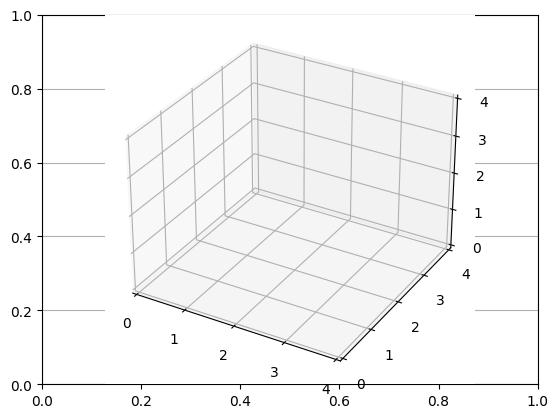

In [8]:
fig = plt.figure()
ticks = np.arange(0, 5, 1)
ax = plt.axes(projection='3d')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)